# NumPy: análise numérica eficiente com Python
- Notebook com todas os códigos, exercícios e aprendizados do curso da biblioteca NumPy da Alura
- Esta biblioteca é voltada para computação numérica e científica, portanto, trabalharemos com objetos do tipo array que servem para realizar operações matemáticas e estatísticas, muito importantes em ciência de dados.
- Ela fornece uma série de vantagens em operações com arrays, que são objetos semelhantes às listas. Entre as vantagens, podemos citar a rapidez das operações, menos memória sendo ocupada e a série de métodos atrelados a esses objetos.

## Visão geral do curso:
- Trabalharemos com um dataset de preços de maçãs. Ou seja, uma tabela de dados semelhante ao que vemos em softwares como Excel e Google Planilhas.


# 1° - Conhecendo a biblioteca e nossos dados

## Importações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carregando DataSet

### Carregando com a bibliotec Pandas
- Ao realizar o carregamento com a biblioteca pandas notamos que o DataSet é carregado como esperados, o que veremos a seguir que não ocorrerá com a biblioteca NumPy

In [2]:
df_view = pd.read_csv("apples_ts.csv")
df_view

,Unnamed: 0,1.2013,2.2013,3.2013,4.2013,5.2013,6.2013,7.2013,8.2013,9.2013,...,6.2019,7.2019,8.2019,9.2019,10.2019,11.2019,12.2019,1.2020,2.2020,3.2020
0,Moscow,79.72,81.08,79.68,79.80,80.63,80.80,80.28,78.99,76.77,...,116.91,125.29,123.94,113.03,102.19,97.83,101.07,103.44,108.23,110.28
1,Kaliningrad,42.67,44.37,44.73,46.75,NaN,51.59,57.80,62.14,56.76,...,79.20,80.85,85.33,75.02,77.95,78.98,76.55,74.89,70.00,81.53
2,Petersburg,62.55,62.73,63.43,63.83,66.06,69.22,72.07,69.31,65.18,...,115.35,123.03,123.08,109.71,97.22,95.75,97.09,98.18,103.10,110.60
3,Krasnodar,48.26,51.01,50.91,53.94,61.27,65.44,56.51,53.00,43.87,...,102.01,116.12,92.06,82.70,66.62,68.11,73.48,82.04,81.19,95.05
4,Ekaterinburg,71.25,71.35,70.90,71.92,72.91,74.39,73.10,70.24,69.12,...,121.68,125.32,123.41,108.48,98.73,96.25,100.12,101.29,102.81,108.53


 ### Carregando com a bibliotec NumPy
- Ao realizar o carregamento com a biblioteca NumPy recebemos um erro falando que não é possível converter o tipo String para Float64, isso porque na primeira coluna do nosso DataSet temos os nomes das cidades.

#### Código Errado:

In [3]:
# np.loadtxt("apples_ts.csv", delimiter = ",")

#### Código Certo: 
`"apples_ts.csv"`: Este é o nome do arquivo a ser lido. No caso, um arquivo CSV chamado "apples_ts.csv".

`delimiter = ","`: Especifica que o delimitador utilizado no arquivo é uma vírgula, indicando que os dados estão separados por vírgulas, como é típico em arquivos CSV.

`usecols = np.arange(1, 88, 1)`: Define quais colunas do arquivo devem ser carregadas. np.arange(1, 88, 1) gera um array de números de 1 até 87 (inclusive), indicando que as colunas de 1 a 87 serão carregadas

In [4]:
dados = np.loadtxt("apples_ts.csv", delimiter = "," , usecols= np.arange(1, 88, 1))

## Dimensões dos Array

### Conhecendo a dimensão e tamanho do nosso DataSet

In [5]:
print(f"O número de dimensões dos nosso dados é {dados.ndim}. Ou seja temos linhas e colunas\n")

print(f"Temos no nosso DataSet um totel de {dados.size} dados\n")

print(f"Nossa base de dados tem {dados.shape[0]} linhas e {dados.shape[1]} colunas")

O número de dimensões dos nosso dados é 2. Ou seja temos linhas e colunas

Temos no nosso DataSet um totel de 522 dados

Nossa base de dados tem 6 linhas e 87 colunas


### Transpondo o nosso DataSet
- Transformando as linhas em colunas

In [6]:
dados_transpostos = dados.T
dados_transpostos

array([[  1.2013,  79.72  ,  42.67  ,  62.55  ,  48.26  ,  71.25  ],
       [  2.2013,  81.08  ,  44.37  ,  62.73  ,  51.01  ,  71.35  ],
       [  3.2013,  79.68  ,  44.73  ,  63.43  ,  50.91  ,  70.9   ],
       [  4.2013,  79.8   ,  46.75  ,  63.83  ,  53.94  ,  71.92  ],
       [  5.2013,  80.63  ,      nan,  66.06  ,  61.27  ,  72.91  ],
       [  6.2013,  80.8   ,  51.59  ,  69.22  ,  65.44  ,  74.39  ],
       [  7.2013,  80.28  ,  57.8   ,  72.07  ,  56.51  ,  73.1   ],
       [  8.2013,  78.99  ,  62.14  ,  69.31  ,  53.    ,  70.24  ],
       [  9.2013,  76.77  ,  56.76  ,  65.18  ,  43.87  ,  69.12  ],
       [ 10.2013,  76.09  ,  50.85  ,  62.13  ,  42.12  ,  68.98  ],
       [ 11.2013,  76.36  ,  46.43  ,  64.17  ,  43.98  ,  68.58  ],
       [ 12.2013,  77.16  ,  46.73  ,  65.5   ,  44.66  ,  69.5   ],
       [  1.2014,  77.5   ,  45.85  ,  66.85  ,  47.73  ,  70.14  ],
       [  2.2014,  79.03  ,  49.25  ,  68.38  ,  52.31  ,  70.58  ],
       [  3.2014,  80.28  ,  48.14

# 2° - Exploração dos dados

## Visualização e seleção

### Salvando as Datas
- Iremos armazenar o retorno na variável datas

`"dados_transpostos[:, 0]"`
- O primeiro argumento das [] é referente as linhas, ou seja, ao botar somente :, ele pegrá todas as linhas do DataSet
- O segundo argumento das [] é referente as colunas, ou seja, botando o valor 0, ele pegará a coluna 0 do DataSet, e a coluna 0 é referente as datas

In [7]:
datas = dados_transpostos[:,0]
datas

array([ 1.2013,  2.2013,  3.2013,  4.2013,  5.2013,  6.2013,  7.2013,
        8.2013,  9.2013, 10.2013, 11.2013, 12.2013,  1.2014,  2.2014,
        3.2014,  4.2014,  5.2014,  6.2014,  7.2014,  8.2014,  9.2014,
       10.2014, 11.2014, 12.2014,  1.2015,  2.2015,  3.2015,  4.2015,
        5.2015,  6.2015,  7.2015,  8.2015,  9.2015, 10.2015, 11.2015,
       12.2015,  1.2016,  2.2016,  3.2016,  4.2016,  5.2016,  6.2016,
        7.2016,  8.2016,  9.2016, 10.2016, 11.2016, 12.2016,  1.2017,
        2.2017,  3.2017,  4.2017,  5.2017,  6.2017,  7.2017,  8.2017,
        9.2017, 10.2017, 11.2017, 12.2017,  1.2018,  2.2018,  3.2018,
        4.2018,  5.2018,  6.2018,  7.2018,  8.2018,  9.2018, 10.2018,
       11.2018, 12.2018,  1.2019,  2.2019,  3.2019,  4.2019,  5.2019,
        6.2019,  7.2019,  8.2019,  9.2019, 10.2019, 11.2019, 12.2019,
        1.202 ,  2.202 ,  3.202 ])

### Salvando os preços

In [8]:
precos = dados_transpostos[:, 1:6]
precos

array([[ 79.72,  42.67,  62.55,  48.26,  71.25],
       [ 81.08,  44.37,  62.73,  51.01,  71.35],
       [ 79.68,  44.73,  63.43,  50.91,  70.9 ],
       [ 79.8 ,  46.75,  63.83,  53.94,  71.92],
       [ 80.63,    nan,  66.06,  61.27,  72.91],
       [ 80.8 ,  51.59,  69.22,  65.44,  74.39],
       [ 80.28,  57.8 ,  72.07,  56.51,  73.1 ],
       [ 78.99,  62.14,  69.31,  53.  ,  70.24],
       [ 76.77,  56.76,  65.18,  43.87,  69.12],
       [ 76.09,  50.85,  62.13,  42.12,  68.98],
       [ 76.36,  46.43,  64.17,  43.98,  68.58],
       [ 77.16,  46.73,  65.5 ,  44.66,  69.5 ],
       [ 77.5 ,  45.85,  66.85,  47.73,  70.14],
       [ 79.03,  49.25,  68.38,  52.31,  70.58],
       [ 80.28,  48.14,  68.77,  56.8 ,  70.78],
       [ 80.05,  49.18,  69.32,  51.15,  72.78],
       [ 78.11,  49.49,  69.77,  54.63,  72.84],
       [ 76.9 ,  49.83,  70.17,  55.8 ,  74.74],
       [ 77.68,  49.14,  70.76,  57.31,  76.43],
       [ 76.05,  63.21,  75.16,  53.81,  81.2 ],
       [ 75.53,  61.

### Separando os preços das Maças por cidade

In [9]:
Moscow_preco = precos[:, 0]
Kaliningrad_preco = precos[:, 1]
Petersburg_preco = precos[:, 2]
Krasnodar_preco = precos[:, 3]
Ekaterinburg_preco = precos[:, 4]

### Criando gráficos com MatPlotLib

#### Plotando um gráfico do aumento do preços das Maças
- Observe que o gráfico ficou estranho, com o eixo X que representa os meses do ano sendo representado por números de 0 a 12

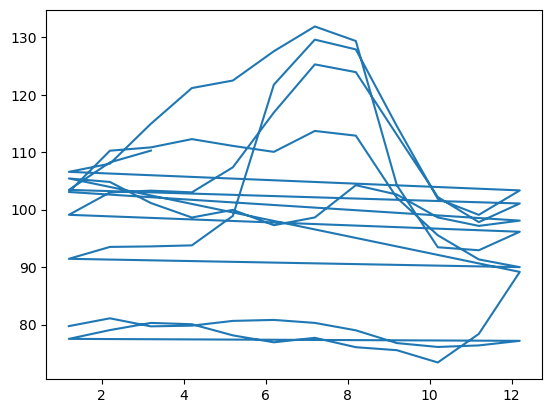

In [10]:
plt.plot(datas, precos[:, 0])

- Para solucionar usaremos a quantidade de meses que temos em nossa base de dados, e essa quantidade de 1 até N representará os meses

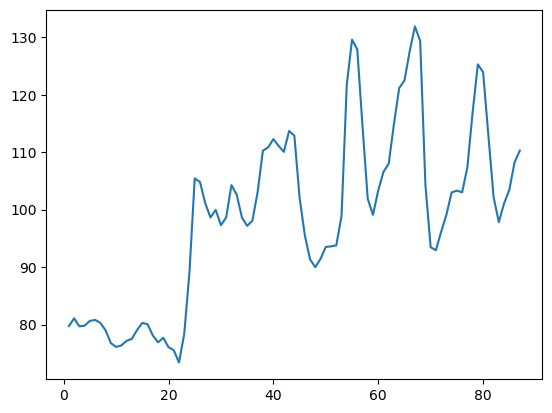

In [11]:
datas_numerada = np.arange(1, 88, 1)
plt.plot(datas_numerada, precos[:, 0])

## Comparação entre arrays

### Analisando dados de Moscow

In [12]:
Moscow_preco_2013 = Moscow_preco[0:12]
Moscow_preco_2014 = Moscow_preco[12:24]
Moscow_preco_2015 = Moscow_preco[24:36]
Moscow_preco_2016 = Moscow_preco[36:48]

Moscow_ano_2013 = datas[0:12]
Moscow_ano_2014 = datas[12:24]
Moscow_ano_2015 = datas[24:36]
Moscow_ano_2016 = datas[36:48]

#### Gráfico para analisar o primeiro ano de Moscow

Text(0.5, 0, 'Meses')

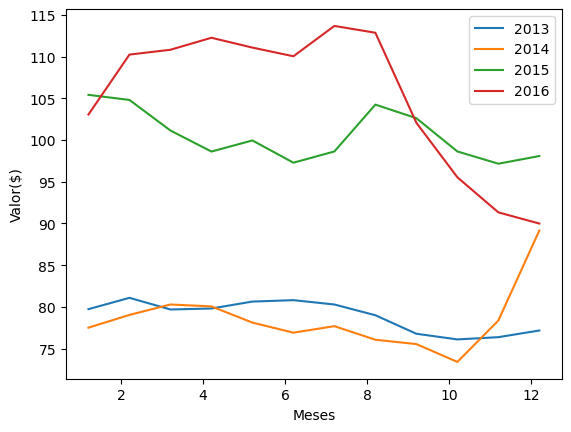

In [13]:
plt.plot(Moscow_ano_2013, Moscow_preco_2013)
plt.plot(Moscow_ano_2014, Moscow_preco_2014) 
plt.plot(Moscow_ano_2015, Moscow_preco_2015) 
plt.plot(Moscow_ano_2016, Moscow_preco_2016)

plt.legend(["2013","2014","2015","2016"])
plt.ylabel("Valor($)")
plt.xlabel("Meses")

## Lidando com NaNs

### Cidade de Kaliningrad
- A cidade tem preços faltando, para isso teremos que limpá-los

#### Verificando se tem valores NaN
- Para isso utilizamos a BuiltIn Fuction do Python `sum()`, que irá somar todos os valores presentes no retorno da função `isna()` da biblioteca **NumPy**
- A função `isna()` retorna um Array de true e false, com true sendo substituindo os NaN e false substituindo os demais valores, e ao utilizar a função `sum()`, caso o resultado seja diferente de 0, existe algum NaN

In [14]:
sum(np.isnan(Kaliningrad_preco))

1

#### Substituindo o NaN pela média do seu sucessor com seu antecessor
- Para isso já teríamos que saber que o valor NaN está na posição 4 do array

In [15]:
Kaliningrad_preco[4] = np.mean([Kaliningrad_preco[3], Kaliningrad_preco[5]])  
sum(np.isnan(Kaliningrad_preco))

0

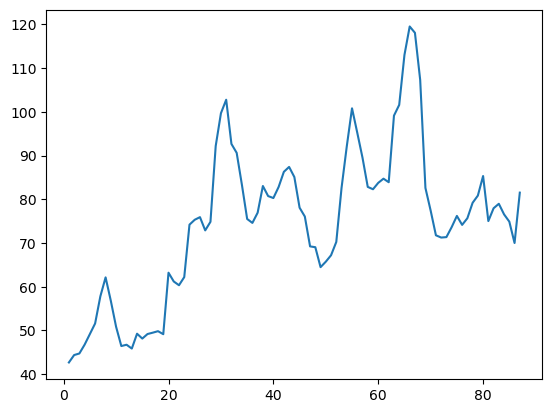

In [16]:
plt.plot(datas_numerada, Kaliningrad_preco)

### Comparando o preço médio entre 2 cidades

In [17]:
preco_medio_moscow = np.mean(Moscow_preco)
preco_medio_kaliningrad = np.mean(Kaliningrad_preco)
print(f"O preço médio de Moscow é {round(preco_medio_moscow, 2)} e o de Kaliningrad é {round(preco_medio_kaliningrad, 2)}")

O preço médio de Moscow é 98.8 e o de Kaliningrad é 74.55


# 3° - Operações entre arrays

## Diferença entre arrays

### Calculando uma reta para ver a taxa de crescimento
- Nessa parte iremos tentar descobrir os melhores valores para a e b para criar uma reta que seja compatível com a taxa de crescimento do preço das Maças de Moscow. Usaremos como base a função abaixo:
- `Y = aX + b`

In [18]:
X = datas_numerada

#### Tentativa 1: a = 2 e b = 80
- A partir desse resultado vemos que a reta não representou muito bem a taxa de crescimento do preço mas Maças em Moscow

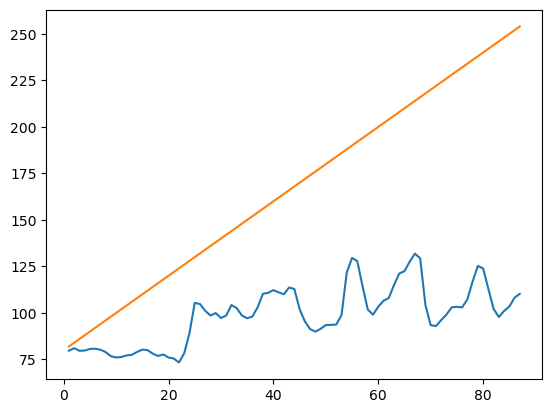

In [19]:
Y = 2*X + 80

plt.plot(datas_numerada, Moscow_preco)
plt.plot(X, Y)

- Criando uma métrica para analisar o quanto a reta se ajustou a esses dados
- `**Moscow - Y**`: Faremos a diferença entre o array de preço de Moscow com a reta Y
- `**np.power()**`: Pegaremos o retorno de Moscow - Y, que será um array e elevaremos todos os elemento ao quadrado pra termos valores negativos
- `**np.sum()**`: Realizaremos a soma de todos os elementos
- `**np.sqrt()**`: Fazer a raiz quadrada da soma

In [20]:
np.sqrt(np.sum(np.power(Moscow_preco-Y, 2)))

749.2329171225728

#### Tentativa 2: a = 0.52 e b = 80
- Por mais que não esteja 100% correta, percebemos que ela se ajustou bem melhor em comparação com a função anterior. A métrica estipulada anteriormente também ajuda a mostrar isso

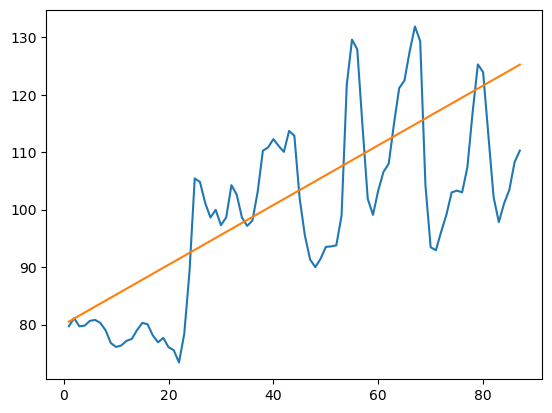

In [21]:
Y = 0.52*X + 80

plt.plot(datas_numerada, Moscow_preco)
plt.plot(X, Y)

In [22]:
np.sqrt(np.sum(np.power(Moscow_preco-Y, 2)))

110.48504740461489

#### Métrica presente o NumPy que realiza o mesmo calcula que codificamos anteriormente

In [23]:
np.linalg.norm(Moscow_preco-Y)

110.48504740461489

## Multiplicação
- Existe uma fórmula para calcularmos os coeficientes angular e linear da reta, que nos permitem calcular o y e ajustar esta reta.

### calculando o coeficiente linear a 

a = Coeficiente angular

n -> número de elementos

Y = Moscow_preco

X = datas_numerada



O coefiente angular pode ser obtido usando a equação:

$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$

In [24]:
Y = Moscow_preco
X = datas_numerada
n = np.size(Moscow_preco)

In [25]:
a = (n * np.sum(X*Y) - np.sum(X) * np.sum(Y)) / ( n * np.sum(np.power(X, 2)) - np.power(np.sum(X), 2))
a

0.43520212145512926

### Calculando o coeficiente linear b

$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$

In [26]:
b = np.mean(Y) - (a * np.mean(X))
b

79.64892274792834

### Calculando a reta

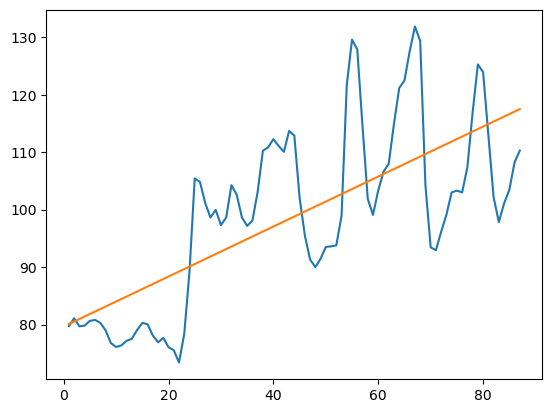

In [27]:
y = a * X + b

plt.plot(datas_numerada, Moscow_preco)
plt.plot(X, y)



In [28]:
np.linalg.norm(Moscow_preco-y)

101.79695399927512

## Motivo da regressão
- Temos os valores dessa reta na posição dos meses, de 0 a 80, pulando a cada 20. Mas e se quisermos calcular o preço, conforme a equação da reta, na metade do mês, como em 41.5?
- 
Para isso, basta utilizarmos a equação da reta com os coeficientes calculados. Ou seja, por termos ajustado os coeficientes, conseguimos calcular valores intermediários mesmo que eles não estejam no array, nos permitindo fazer uma estimativa de valor.

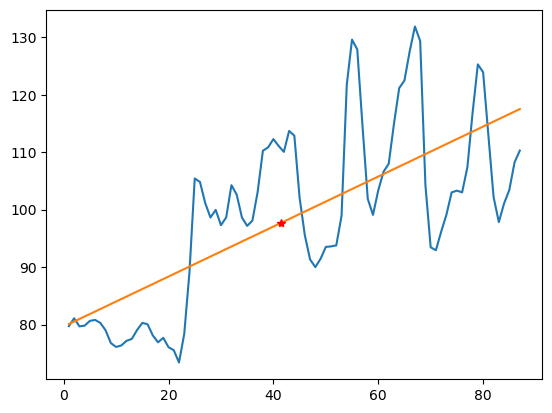

In [29]:
plt.plot(datas_numerada, Moscow_preco)
plt.plot(X,y)
plt.plot(41.5,41.5*a+b,'*r')

### Estimulando Valores Futuros

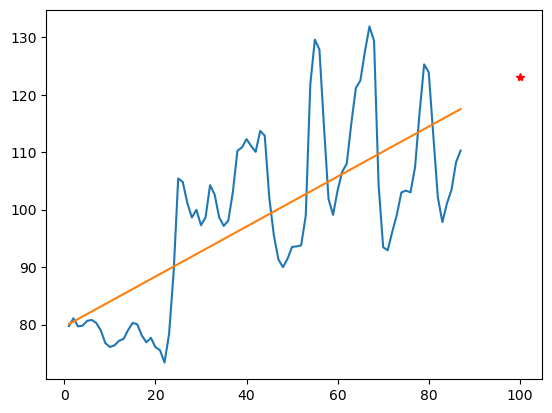

In [30]:
plt.plot(datas_numerada, Moscow_preco)
plt.plot(X,y)
plt.plot(100,100*a+b,'*r')

# 4° - Números Aleatórios

## Valores em um intervalo

### Gerando números aleatórios com NumPy

- Gerando números inteiros aleatórios com NumPy
- `low:` Menor número que pode ser sorteado
- `High:` Maior número que pode ser sorteado
- `Size:` Quantidade de N° sorteados

In [31]:
np.random.randint(low=40, high = 100, size = 100)

array([62, 49, 73, 45, 51, 69, 60, 59, 52, 76, 99, 68, 69, 64, 41, 99, 83,
       81, 94, 58, 57, 92, 50, 66, 95, 75, 81, 54, 96, 40, 66, 71, 81, 48,
       91, 97, 50, 55, 96, 90, 45, 94, 87, 67, 82, 78, 77, 94, 95, 53, 41,
       80, 71, 96, 94, 42, 69, 87, 91, 96, 68, 51, 51, 76, 51, 47, 68, 84,
       87, 43, 49, 56, 78, 75, 41, 83, 54, 61, 48, 91, 63, 74, 81, 90, 89,
       66, 56, 71, 73, 98, 53, 75, 73, 66, 49, 96, 97, 57, 61, 99])

- Gerando números float aleatórios com NumPy
- `low:` Menor número que pode ser sorteado
- `High:` Maior número que pode ser sorteado
- `Size:` Quantidade de N° sorteados

In [32]:
np.random.uniform(low = 0.1, high = 0.9, size = 100)

array([0.87630021, 0.82860092, 0.49306424, 0.72158568, 0.15681824,
       0.75803772, 0.15429418, 0.83696446, 0.42020818, 0.80386741,
       0.60950846, 0.37948254, 0.33719993, 0.31313333, 0.37209067,
       0.42921951, 0.72508618, 0.51222449, 0.86861244, 0.22634184,
       0.80761951, 0.39633072, 0.10409754, 0.33751441, 0.7645065 ,
       0.53775214, 0.3385554 , 0.67471309, 0.26381778, 0.6231362 ,
       0.78607048, 0.10711002, 0.32352539, 0.51138929, 0.78439297,
       0.61315293, 0.54487105, 0.84985852, 0.25884563, 0.68424036,
       0.61433099, 0.65769309, 0.46230773, 0.77768542, 0.51888332,
       0.18017867, 0.26327482, 0.56020795, 0.59256671, 0.33789741,
       0.34834734, 0.12897923, 0.88794476, 0.35258531, 0.18761728,
       0.53718902, 0.334723  , 0.85192798, 0.74863176, 0.80569456,
       0.34655135, 0.59627126, 0.56561041, 0.70847834, 0.10731418,
       0.45300153, 0.12728162, 0.88174771, 0.1249578 , 0.58357279,
       0.31907861, 0.85912717, 0.39857511, 0.53166972, 0.20620

### Aleatorizando valores do Coeficiente Angular (a)

In [33]:
coef_angulares = np.random.uniform(low = 0.1, high = 0.9, size = 100)

### Testando cada um desses Coeficientes Angulares gerados
- Geramos vários Coef. Angulares e calculamos a norma, nosso objetivo é pegar a menor norma

In [34]:
norma = np.array([])

for i in range(len(coef_angulares)):
    norma = np.append(norma, np.linalg.norm(Moscow_preco - (coef_angulares[i]*X + b)))

In [35]:
norma

array([111.44766864, 156.79675882, 112.45276262, 130.51313028,
       120.22590906, 110.39324004, 182.18818383, 113.65990324,
       170.64319625, 107.30622691, 159.6497644 , 106.41759009,
       105.89322065, 103.80158108, 106.10001474, 238.23268709,
       135.05636062, 113.48275686, 163.77989582, 106.4952186 ,
       131.73708858, 223.57400519, 188.67777383, 237.54861828,
       104.23919351, 104.7918335 , 219.06404894, 193.3092579 ,
       233.84122656, 174.05430399, 233.61499885, 111.88986894,
       110.53544002, 105.57505027, 132.81809438, 111.4936984 ,
       173.30755884, 171.45854148, 118.60507211, 116.0888357 ,
       186.49087626, 214.98212566, 163.05282674, 109.19870427,
       178.68861093, 129.48797673, 198.48502402, 108.94648206,
       176.24770501, 162.89692037, 162.02853353, 106.87100261,
       131.56557324, 153.0477252 , 124.48151854, 164.13826928,
       224.55229373, 185.365049  , 124.0138028 , 224.36456679,
       180.50292498, 222.45777163, 111.85186251, 110.33

In [36]:
menor_norma = np.min(norma)

posicao_menor_norma = np.where(norma == np.min(norma))[0]


print(f"O valor da menor norma é {menor_norma} e ela está localizada na posição {posicao_menor_norma[0]} do array norma. Logo o valor de seu coeficiente angular é {coef_angulares[posicao_menor_norma]}")


O valor da menor norma é 101.93309579302306 e ela está localizada na posição 67 do array norma. Logo o valor de seu coeficiente angular é [0.42405715]


## Reprodutibilidade
- Gerando os mesmo números aleatórios através de uma semente (seed), ou seja, mesmo que eu reexecute o código os números aleatórios gerados serão os mesmos

In [37]:
np.random.seed(16)

np.random.uniform(low = 0.1, high = 0.9, size = 100)

array([0.27863286, 0.51853067, 0.54056117, 0.13648156, 0.38858307,
       0.27846475, 0.65098093, 0.23098514, 0.15625989, 0.85280869,
       0.5509451 , 0.16239387, 0.67811241, 0.22676174, 0.30022505,
       0.3347898 , 0.65728857, 0.47141127, 0.27204971, 0.45746101,
       0.196703  , 0.83414961, 0.55315706, 0.47761545, 0.35165314,
       0.13457258, 0.70195593, 0.53461524, 0.71375234, 0.73235901,
       0.1577771 , 0.62777267, 0.14263947, 0.64801956, 0.45468077,
       0.47439692, 0.62884747, 0.65197331, 0.31066359, 0.10918315,
       0.71703556, 0.75291386, 0.21171328, 0.5624054 , 0.37253942,
       0.28577239, 0.258915  , 0.31719262, 0.88148221, 0.27234318,
       0.38512593, 0.11471996, 0.59343222, 0.28432431, 0.69388139,
       0.56740017, 0.43608284, 0.66740227, 0.87763642, 0.74803129,
       0.44452414, 0.86618288, 0.13820648, 0.68622544, 0.64053316,
       0.52160413, 0.55358996, 0.6783562 , 0.64608268, 0.73625014,
       0.19027642, 0.25933011, 0.67705538, 0.41509386, 0.37134

## Gerando uma seed para reproduzir sempre o mesmo resultado e criando um arquivo txt com o resultado gerado

In [38]:
np.random.seed(84)

coef_angulares = np.random.uniform(low = 0.1, high = 0.9, size = 100)

norma = np.array([])

for i in range(len(coef_angulares)):
    norma = np.append(norma, np.linalg.norm(Moscow_preco - (coef_angulares[i]*X + b)))

menor_norma = np.min(norma)

posicao_menor_norma = np.where(norma == np.min(norma))[0]

print(f"O valor da menor norma é {menor_norma} e ela está localizada na posição {posicao_menor_norma[0]} do array norma. Logo o valor de seu coeficiente angular é {coef_angulares[posicao_menor_norma]}")

dados = np.column_stack([norma, coef_angulares])

O valor da menor norma é 101.79720981329277 e ela está localizada na posição 8 do array norma. Logo o valor de seu coeficiente angular é [0.43471917]


In [39]:
np.savetxt("dados.csv", dados, delimiter=",")

# N° - Para saber mais

## Função `np.copy()`
- Ao trabalharmos com arrays ou outras variáveis em Python, eventualmente fazemos cópias das variáveis que estamos lidando. Quando fazemos a cópia de uma variável, temos que ter em mente o que acontece com ela para evitar que usemos determinados valores pensando que são outros valores. Para lidar com cópias dos arrays, a biblioteca Numpy possui uma função específica.

In [40]:
preco_imoveis = np.array([10000,120000,11000,200000])
preco_imoveis_sao_paulo = preco_imoveis
preco_imoveis[0] = 120000

print(preco_imoveis_sao_paulo[0])

120000


- Perceba que mesmo atualizando o valor na posição 0 da variável `preco_imoveis`, também foi alterado os valores da vatiável  `preco_imoveis_sao_paulo`
- Para solucionar isso é só utilizamos a função copy() do NumPy

In [41]:
preco_imoveis_sao_paulo = np.copy(preco_imoveis)

preco_imoveis[0] = 50000

print(preco_imoveis_sao_paulo[0])

120000
